In [1]:
%matplotlib inline
import numpy as np
import scipy.signal as scs #filtr S-G
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error#metryki do porownan

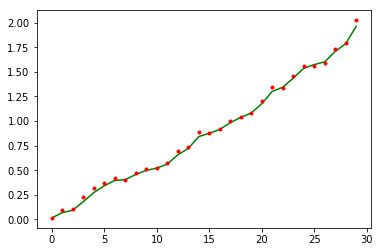

In [5]:
def kalmN(N, druk = False):
    
    """
    Predykcja
        X - przewidywana wartosc stanu
        P - kowariancja stanu
        A n x n - macierz przejscia stanu
        B n x 1 - macierz sterowania
    Korekcja
        H n x 1 - macierz wizazaca stany z wielkosciami mierzonymi
        R - macierz kowariancji szumu pomirowego
        Q - macierz kowariancji procesu
        Y - pomiar w kroku k
        V - measurement residual w kroku k
        S - kowariancja predykcji pomiaru w kroku k
        K - wzmocnienie
    
    
    """
    
    
    
    dt = 0.1#krok czasowy
    
    #model
    X = np.array([[0.0],[0.0],[0.1],[0.1]])    
    P = np.diag((0.1, 0.1, 0.1, 0.1))
    A = np.array([[1, 0 , dt, 0],\
                 [0, 1, 0, dt],\
                 [0, 0, 1, 0],\
                 [0, 0, 0, 1]])
    Q = np.eye((X.shape)[0])# X is Nx1
    B = np.eye((X.shape)[0])# X is Nx1
    U = np.zeros(((X.shape)[0],1))# U is Nx1
       
    H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
    Y = np.array([[X[0,0] + np.abs(np.random.randn())],\
                  [X[1,0] + np.abs(np.random.randn())]])
    
    R = np.eye((Y.shape)[0])# X is Nx1   
    
    if druk == True:
        print("X", X.shape)
        print("P", P.shape)
        print("A", A.shape)
        print("Q", Q.shape)
        print("B", B.shape)
        print("U", U.shape)
        print("Y", Y.shape)
        print("H", H.shape)
        print("R", R.shape)    
    kf_out = []
    y_out = []
    for i in np.arange(0,N):
        #pomiar
        Y = np.array([[X[0,0] + np.abs(0.1*np.random.randn())], \
                  [X[1,0] + np.abs(0.1*np.random.randn())]])
    
        #predykcja
        X = np.dot(A,X) + np.dot(B,U)# X[k] = A*X[k-1] + B * u[k-1] 
        P = np.dot(A, np.dot(P,A.T)) + Q# P[k] = A*P[k-1]A' + Q
        #korekcja
        #HX = np.dot(H,X)
        V = Y - np.dot(H,X)# measurement residual w kroku k
        S = np.dot(H, np.dot(P,H.T)) + R# predykcja w kroku k kowariancji szumu pomiarowego
        K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
        X = X + np.dot(K, V)
        P = P - np.dot(K, np.dot(S, K.T))  
        kf_out.append(X[0][0])#wyjscie KF
        y_out.append(Y[0][0])#pomiar
    
    return kf_out, y_out
#test
kf_out, y_out = kalmN(30)
plt.plot(kf_out, '-g')
plt.plot(y_out, '.r')
plt.show()

D:\Anaconda\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


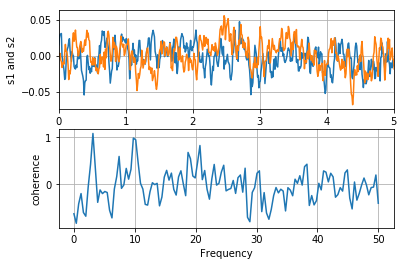

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# make a little extra space between the subplots
plt.subplots_adjust(wspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, t, s2)
plt.xlim(0, 5)
plt.xlabel('time')
plt.ylabel('s1 and s2')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.cohere(s1, s2, 256, 1./dt)
plt.ylabel('coherence')
plt.show()

In [7]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

In [10]:
output_notebook()

Loading BokehJS ...

In [15]:
from numpy import cos, linspace
x = linspace(-6, 6, 100)
y = cos(x**3)
p = figure(width=500, height=500)
p.line(x, y, color="firebrick", alpha=0.5)
show(p)